# Tuning Neural Networks with Regularization - Lab

## Introduction

Recall from the last lab that you had a training accuracy close to 90% and a test set accuracy close to 76%.

As with your previous machine learning work, you should be asking a couple of questions:
- Is there high bias? yes/no
- Is there high variance? yes/no 

In this lab, you'll use the a train-validate-test partition as well as a validation set to get better insights of how to tune neural networks using regularization techniques. You'll start by repeating the process from the last section: importing the data and performing preprocessing including one-hot encoding. From there, you'll define and compile the model like before. However, this time, when you are presented with the `history` dictionary of the model, you will have additional data entries for not only the train and test set but also the validation set.

## Objectives

You will be able to:

* Construct and run a basic model in Keras
* Construct a validation set and explain potential benefits
* Apply L1 and L2 regularization
* Apply dropout regularization
* Observe and comment on the effect of using more data

## Import the libraries

As usual, start by importing some of the packages and modules that you intend to use. The first thing you'll be doing is importing the data and taking a random sample, so that should clue you in to what tools to import. If you need more tools down the line, you can always import additional packages later.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tensorflow.python.keras.preprocessing.text import Tokenizer

## Load the Data

As with the previous lab, the data is stored in a file **Bank_complaints.csv**. Load and preview the dataset.

In [2]:
df = pd.read_csv('Bank_complaints.csv')
df.head()

,Product,Consumer complaint narrative
0,Student loan,In XX/XX/XXXX I filled out the Fedlaon applica...
1,Student loan,I am being contacted by a debt collector for p...
2,Student loan,I cosigned XXXX student loans at SallieMae for...
3,Student loan,Navient has sytematically and illegally failed...
4,Student loan,My wife became eligible for XXXX Loan Forgiven...


## Preprocessing Overview

Before you begin to practice some of your new tools regarding regularization and optimization, let's practice munging some data as you did in the previous section with bank complaints. Recall some techniques:

* Train - test split
* Sampling in order to reduce training time (investigate model accuracy vs data size later on)
* One-hot encoding your complaint text
* Transforming your category labels

## Preprocessing: Generate a Random Sample

Since you have quite a bit of data and training networks takes a substantial amount of time and resources, downsample in order to test your initial pipeline. Going forward, these can be interesting areas of investigation: how does your models performance change as you increase (or decrease) the size of your dataset?  

Generate the random sample using seed 123 for consistency of results. Make your new sample have 10,000 observations.

In [3]:
df = df.sample(10000, random_state=123)
y = df["Product"]
X = df["Consumer complaint narrative"]

## Train-test Split

Below, perform an appropriate train test split.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1500, random_state=42)

## Running the model using a validation set.

## Creating the Validation Set

In the lecture, you saw that in deep learning, you generally set aside a validation set, which is then used during hyperparameter tuning. Afterwards, when you have decided upon a final model, the test can then be used to define the final model perforance. 

In this example, take the first 1000 cases out of the training set to create a validation set. You should do this for both `train` and `label_train`.

In [5]:
#Just run this block of code 

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=1000, random_state=123)

## Preprocessing: One-hot Encoding of the Complaints

As before, you need to do some preprocessing and data manipulationg before building the neural network. 

Keep the 2,000 most common words and use one-hot encoding to reformat the complaints into a matrix of vectors.

In [6]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train_final)

X_train_tok = tokenizer.texts_to_matrix(X_train_final, mode='binary')
X_val = tokenizer.texts_to_matrix(X_val, mode='binary')

## Preprocessing: Encoding the Products

Similarly, now transform the descriptive product labels to integers labels. After transforming them to integer labels, retransform them into a matrix of binary flags, one for each of the various product labels.  
  
> **Note**: This is similar to your previous work with dummy variables. Each of the various product categories will be its own column, and each observation will be a row. In turn, each of these observation rows will have a 1 in the column associated with it's label, and all other entries for the row will be zero.

In [7]:
lb = LabelBinarizer()
lb.fit(y_train_final)

y_train_lb = to_categorical(lb.transform(y_train_final))[:, :, 1]
y_val = to_categorical(lb.transform(y_val))[:, :, 1]

## Creating the Model

Rebuild a fully connected (Dense) layer network with relu activations in Keras.

Recall that you used 2 hidden with 50 units in the first layer and 25 in the second, both with a `relu` activation function. Because you are dealing with a multiclass problem (classifying the complaints into 7 classes), use a softmax classifyer in order to output 7 class probabilities per case. 

In [8]:
random.seed(123)
from tensorflow.python.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

## Compiling the Model
In the compiler, you'll be passing the optimizer, loss function, and metrics. Train the model for 120 epochs in mini-batches of 256 samples. This time, include the argument `validation_data` and assign it `(val, label_val)`

In [9]:
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## Training the Model

Ok, now for the resource intensive part: time to train your model! Note that this is where you also introduce the validation data to the model.

In [10]:
#Code provided; note the extra validation parameter passed.
model_val = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=120,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/120
7500/7500 [==============================] - 6s 749us/sample - loss: 1.9569 - accuracy: 0.1537 - val_loss: 1.9416 - val_accuracy: 0.1610
Epoch 2/120
7500/7500 [==============================] - 1s 98us/sample - loss: 1.9349 - accuracy: 0.1727 - val_loss: 1.9282 - val_accuracy: 0.1750
Epoch 3/120
7500/7500 [==============================] - 1s 79us/sample - loss: 1.9188 - accuracy: 0.1832 - val_loss: 1.9160 - val_accuracy: 0.1800
Epoch 4/120
7500/7500 [==============================] - 1s 88us/sample - loss: 1.9037 - accuracy: 0.1985 - val_loss: 1.9033 - val_accuracy: 0.1860
Epoch 5/120
7500/7500 [==============================] - 1s 86us/sample - loss: 1.8881 - accuracy: 0.2144 - val_loss: 1.8899 - val_accuracy: 0.2130
Epoch 6/120
7500/7500 [==============================] - 1s 104us/sample - loss: 1.8713 - accuracy: 0.2323 - val_loss: 1.8750 - val_accuracy: 0.2230
Epoch 7/120
7500/7500 [==============================] - 1s 10

Epoch 56/120
7500/7500 [==============================] - 1s 72us/sample - loss: 0.6239 - accuracy: 0.7851 - val_loss: 0.7758 - val_accuracy: 0.7400
Epoch 57/120
7500/7500 [==============================] - 1s 86us/sample - loss: 0.6165 - accuracy: 0.7885 - val_loss: 0.7735 - val_accuracy: 0.7400
Epoch 58/120
7500/7500 [==============================] - 1s 74us/sample - loss: 0.6100 - accuracy: 0.7912 - val_loss: 0.7692 - val_accuracy: 0.7370
Epoch 59/120
7500/7500 [==============================] - 1s 92us/sample - loss: 0.6035 - accuracy: 0.7923 - val_loss: 0.7653 - val_accuracy: 0.7390
Epoch 60/120
7500/7500 [==============================] - 1s 103us/sample - loss: 0.5975 - accuracy: 0.7953 - val_loss: 0.7644 - val_accuracy: 0.7440
Epoch 61/120
7500/7500 [==============================] - 1s 77us/sample - loss: 0.5916 - accuracy: 0.7957 - val_loss: 0.7595 - val_accuracy: 0.7360
Epoch 62/120
7500/7500 [==============================] - 1s 175us/sample - loss: 0.5860 - accuracy: 0.79

Epoch 111/120
7500/7500 [==============================] - 1s 74us/sample - loss: 0.3959 - accuracy: 0.8684 - val_loss: 0.7237 - val_accuracy: 0.7580
Epoch 112/120
7500/7500 [==============================] - 1s 78us/sample - loss: 0.3932 - accuracy: 0.8676 - val_loss: 0.7222 - val_accuracy: 0.7590
Epoch 113/120
7500/7500 [==============================] - 1s 79us/sample - loss: 0.3902 - accuracy: 0.8713 - val_loss: 0.7270 - val_accuracy: 0.7590
Epoch 114/120
7500/7500 [==============================] - 1s 96us/sample - loss: 0.3871 - accuracy: 0.8723 - val_loss: 0.7238 - val_accuracy: 0.7520
Epoch 115/120
7500/7500 [==============================] - 1s 93us/sample - loss: 0.3851 - accuracy: 0.8740 - val_loss: 0.7210 - val_accuracy: 0.7600
Epoch 116/120
7500/7500 [==============================] - 1s 79us/sample - loss: 0.3825 - accuracy: 0.8751 - val_loss: 0.7223 - val_accuracy: 0.7610
Epoch 117/120
7500/7500 [==============================] - 1s 82us/sample - loss: 0.3794 - accuracy:

## Retrieving Performance Results: the `history` dictionary

The dictionary `history` contains four entries this time: one per metric that was being monitored during training and during validation.

In [11]:
model_val_dict = model_val.history
model_val_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [12]:
results_train = model.evaluate(X_train_tok, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

7500/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training Loss: 0.369 Training Accuracy: 0.882


## Preprocess then evaluate our models performance on the test set

In [13]:
X_test_tok = tokenizer.texts_to_matrix(X_test, mode='binary')
y_test_cat = to_categorical(lb.transform(y_test))[:, :, 1]

results_test = model.evaluate(X_test_tok, y_test_cat)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')

1500/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Testing Loss: 0.609 Testing Accuracy: 0.779


In [14]:
model.metrics_names

['loss', 'accuracy']

The first element of the list returned by `model.evaluate` is the loss, and the second is the accuracy score. 

Note that the result you obtained here isn't exactly the same as before. This is because the training set is slightly different! You removed 1000 instances for validation!

## Plotting the Results

Plot the loss function versus the number of epochs. Be sure to include the training and the validation loss in the same plot. Then, create a second plot comparing training and validation accuracy to the number of epochs.

NameError: name 'val_loss' is not defined

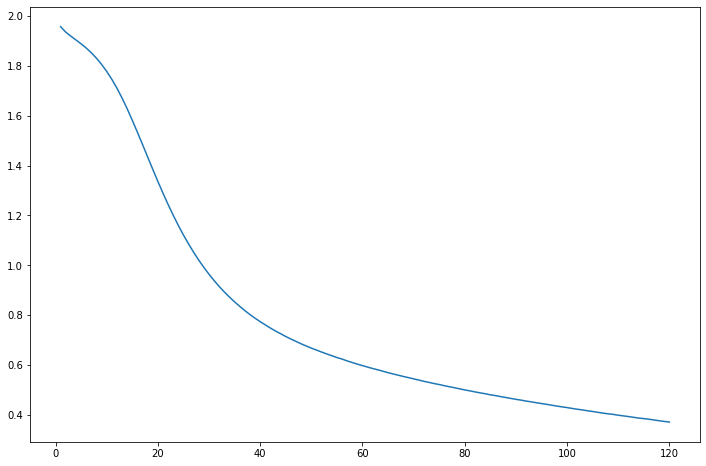

In [15]:
fig, ax = plt.subplots(figsize=(12, 8))

loss_values = model_val_dict['loss']
val_loss_values = model_val_dict['val_loss']

epochs = range(1, len(loss_values) + 1)
ax.plot(epochs, loss_values, label='Training loss')
ax.plot(epochs, val_loss, label='Validation loss')

ax.set_title('Training & Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

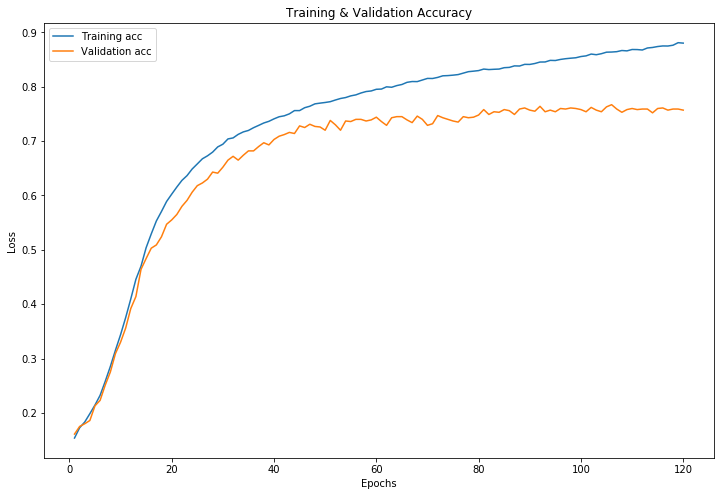

In [16]:
fig, ax = plt.subplots(figsize=(12, 8))

acc_values = model_val_dict['accuracy']
val_acc_values = model_val_dict['val_accuracy']

ax.plot(epochs, acc_values, label='Training acc')
ax.plot(epochs, val_acc_values, label='Validation acc')
ax.set_title('Training & Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

Notice an interesting pattern here: although the training accuracy keeps increasing when going through more epochs, and the training loss keeps decreasing, the validation accuracy and loss seem to be reaching a limit around the 60th epoch. This means that you're probably **overfitting** the model to the training data when you train for many epochs past this dropoff point of around 40 epochs. Luckily, you learned how to tackle overfitting in the previous lecture! Since it seems clear that you are training too long, include early stopping at the 60th epoch first.

## Early Stopping

Below, observe how to update the model to include an earlier cutoff point:

In [17]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

final_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=60,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/60
7500/7500 [==============================] - 3s 358us/sample - loss: 1.9377 - accuracy: 0.1671 - val_loss: 1.9228 - val_accuracy: 0.1950
Epoch 2/60
7500/7500 [==============================] - 0s 57us/sample - loss: 1.9078 - accuracy: 0.2085 - val_loss: 1.9018 - val_accuracy: 0.2230
Epoch 3/60
7500/7500 [==============================] - 0s 57us/sample - loss: 1.8812 - accuracy: 0.2296 - val_loss: 1.8813 - val_accuracy: 0.2310
Epoch 4/60
7500/7500 [==============================] - 0s 54us/sample - loss: 1.8552 - accuracy: 0.2461 - val_loss: 1.8590 - val_accuracy: 0.2580
Epoch 5/60
7500/7500 [==============================] - 1s 67us/sample - loss: 1.8273 - accuracy: 0.2709 - val_loss: 1.8322 - val_accuracy: 0.2800
Epoch 6/60
7500/7500 [==============================] - 1s 70us/sample - loss: 1.7959 - accuracy: 0.3076 - val_loss: 1.8019 - val_accuracy: 0.3160
Epoch 7/60
7500/7500 [==============================] - 1s 67us/sampl

7500/7500 [==============================] - 0s 62us/sample - loss: 0.5924 - accuracy: 0.7996 - val_loss: 0.7638 - val_accuracy: 0.7190
Epoch 57/60
7500/7500 [==============================] - 0s 57us/sample - loss: 0.5869 - accuracy: 0.8019 - val_loss: 0.7575 - val_accuracy: 0.7230
Epoch 58/60
7500/7500 [==============================] - 0s 61us/sample - loss: 0.5810 - accuracy: 0.8024 - val_loss: 0.7580 - val_accuracy: 0.7260
Epoch 59/60
7500/7500 [==============================] - 1s 69us/sample - loss: 0.5756 - accuracy: 0.8049 - val_loss: 0.7517 - val_accuracy: 0.7270
Epoch 60/60
7500/7500 [==============================] - 0s 60us/sample - loss: 0.5700 - accuracy: 0.8085 - val_loss: 0.7494 - val_accuracy: 0.7240


Now, you can use the test set to make label predictions

In [19]:
results_train = model.evaluate(X_train_tok, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

results_test = model.evaluate(X_test_tok, y_test_cat)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')

7500/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training Loss: 0.565 Training Accuracy: 0.811
1500/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Testing Loss: 0.65 Testing Accuracy: 0.775


We've significantly reduced the variance, so this is already pretty good! your test set accuracy is slightly worse, but this model will definitely be more robust than the 120 epochs model you originally fit.

Now, take a look at how regularization techniques can further improve your model performance.

## L2 Regularization

First, take a look at L2 regularization. Keras makes L2 regularization easy. Simply add the `kernel_regularizer=keras.regularizers.l2(lambda_coeff)` parameter to any model layer. The `lambda_coeff` parameter determines the strength of the regularization you wish to perform.

In [20]:
from keras import regularizers
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L2_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=120,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Using TensorFlow backend.


Train on 7500 samples, validate on 1000 samples
Epoch 1/120
7500/7500 [==============================] - 8s 1ms/sample - loss: 2.5940 - accuracy: 0.1637 - val_loss: 2.5856 - val_accuracy: 0.1670
Epoch 2/120
7500/7500 [==============================] - 1s 167us/sample - loss: 2.5632 - accuracy: 0.2039 - val_loss: 2.5610 - val_accuracy: 0.2140
Epoch 3/120
7500/7500 [==============================] - 1s 151us/sample - loss: 2.5366 - accuracy: 0.2359 - val_loss: 2.5366 - val_accuracy: 0.2430
Epoch 4/120
7500/7500 [==============================] - 1s 143us/sample - loss: 2.5091 - accuracy: 0.2584 - val_loss: 2.5105 - val_accuracy: 0.2610
Epoch 5/120
7500/7500 [==============================] - 1s 136us/sample - loss: 2.4799 - accuracy: 0.2805 - val_loss: 2.4819 - val_accuracy: 0.2810
Epoch 6/120
7500/7500 [==============================] - 1s 106us/sample - loss: 2.4478 - accuracy: 0.3055 - val_loss: 2.4490 - val_accuracy: 0.3010
Epoch 7/120
7500/7500 [==============================] - 1s 

7500/7500 [==============================] - 1s 138us/sample - loss: 1.1772 - accuracy: 0.7852 - val_loss: 1.3247 - val_accuracy: 0.7340
Epoch 56/120
7500/7500 [==============================] - 1s 196us/sample - loss: 1.1694 - accuracy: 0.7884 - val_loss: 1.3180 - val_accuracy: 0.7340
Epoch 57/120
7500/7500 [==============================] - 1s 100us/sample - loss: 1.1619 - accuracy: 0.7917 - val_loss: 1.3157 - val_accuracy: 0.7390
Epoch 58/120
7500/7500 [==============================] - 1s 164us/sample - loss: 1.1552 - accuracy: 0.7901 - val_loss: 1.3086 - val_accuracy: 0.7380
Epoch 59/120
7500/7500 [==============================] - 1s 200us/sample - loss: 1.1476 - accuracy: 0.7951 - val_loss: 1.3051 - val_accuracy: 0.7410
Epoch 60/120
7500/7500 [==============================] - 1s 97us/sample - loss: 1.1410 - accuracy: 0.7951 - val_loss: 1.3003 - val_accuracy: 0.7410
Epoch 61/120
7500/7500 [==============================] - 1s 110us/sample - loss: 1.1342 - accuracy: 0.7973 - val_

Epoch 110/120
7500/7500 [==============================] - 1s 86us/sample - loss: 0.8917 - accuracy: 0.8600 - val_loss: 1.1640 - val_accuracy: 0.7540
Epoch 111/120
7500/7500 [==============================] - 1s 77us/sample - loss: 0.8881 - accuracy: 0.8593 - val_loss: 1.1590 - val_accuracy: 0.7530
Epoch 112/120
7500/7500 [==============================] - 1s 79us/sample - loss: 0.8844 - accuracy: 0.8620 - val_loss: 1.1598 - val_accuracy: 0.7550
Epoch 113/120
7500/7500 [==============================] - 1s 74us/sample - loss: 0.8808 - accuracy: 0.8615 - val_loss: 1.1578 - val_accuracy: 0.7540
Epoch 114/120
7500/7500 [==============================] - 1s 79us/sample - loss: 0.8768 - accuracy: 0.8648 - val_loss: 1.1557 - val_accuracy: 0.7560
Epoch 115/120
7500/7500 [==============================] - 1s 83us/sample - loss: 0.8736 - accuracy: 0.8639 - val_loss: 1.1546 - val_accuracy: 0.7520
Epoch 116/120
7500/7500 [==============================] - 1s 77us/sample - loss: 0.8698 - accuracy:

In [21]:
L2_model_dict = L2_model.history
L2_model_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Now, look at the training accuracy as well as the validation accuracy for both the L2 and the model without regularization (for 120 epochs).

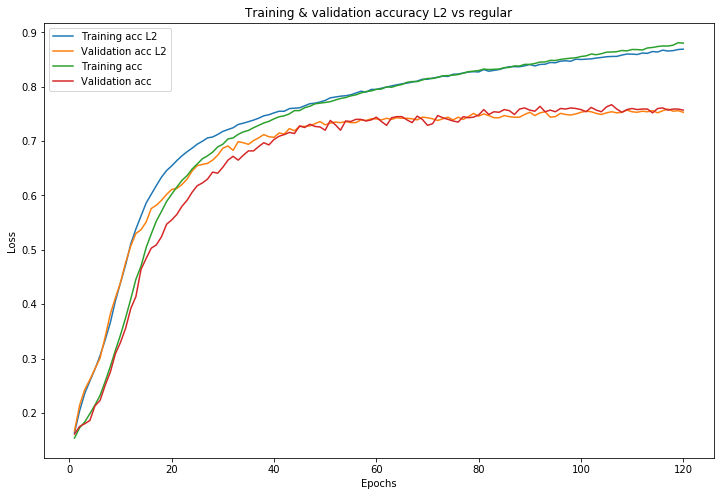

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))

acc_values = L2_model_dict['accuracy'] 
val_acc_values = L2_model_dict['val_accuracy']
model_acc = model_val_dict['accuracy']
model_val_acc = model_val_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, acc_values, label='Training acc L2')
ax.plot(epochs, val_acc_values, label='Validation acc L2')
ax.plot(epochs, model_acc, label='Training acc')
ax.plot(epochs, model_val_acc, label='Validation acc')
ax.set_title('Training & validation accuracy L2 vs regular')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

The results of L2 regularization are quite disappointing here. Notice the discrepancy between validation and training accuracy seems to have decreased slightly, but the end result is definitely not getting better. 

## L1 Regularization

Have a look at L1 regularization. Will this work better?

In [23]:
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L1_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=120,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/120
7500/7500 [==============================] - 2s 298us/sample - loss: 15.9700 - accuracy: 0.1485 - val_loss: 15.5671 - val_accuracy: 0.1640
Epoch 2/120
7500/7500 [==============================] - 1s 75us/sample - loss: 15.2127 - accuracy: 0.1855 - val_loss: 14.8276 - val_accuracy: 0.1920
Epoch 3/120
7500/7500 [==============================] - 1s 77us/sample - loss: 14.4828 - accuracy: 0.2075 - val_loss: 14.1125 - val_accuracy: 0.2000
Epoch 4/120
7500/7500 [==============================] - 1s 73us/sample - loss: 13.7761 - accuracy: 0.2200 - val_loss: 13.4194 - val_accuracy: 0.2060
Epoch 5/120
7500/7500 [==============================] - 1s 67us/sample - loss: 13.0913 - accuracy: 0.2259 - val_loss: 12.7476 - val_accuracy: 0.2040
Epoch 6/120
7500/7500 [==============================] - 1s 75us/sample - loss: 12.4269 - accuracy: 0.2283 - val_loss: 12.0951 - val_accuracy: 0.2100
Epoch 7/120
7500/7500 [============================

7500/7500 [==============================] - 1s 171us/sample - loss: 1.8654 - accuracy: 0.6432 - val_loss: 1.8980 - val_accuracy: 0.6310
Epoch 56/120
7500/7500 [==============================] - 1s 101us/sample - loss: 1.8518 - accuracy: 0.6449 - val_loss: 1.8873 - val_accuracy: 0.6390
Epoch 57/120
7500/7500 [==============================] - 1s 86us/sample - loss: 1.8385 - accuracy: 0.6472 - val_loss: 1.8738 - val_accuracy: 0.6330
Epoch 58/120
7500/7500 [==============================] - 1s 172us/sample - loss: 1.8258 - accuracy: 0.6485 - val_loss: 1.8646 - val_accuracy: 0.6360
Epoch 59/120
7500/7500 [==============================] - 2s 264us/sample - loss: 1.8135 - accuracy: 0.6507 - val_loss: 1.8473 - val_accuracy: 0.6420
Epoch 60/120
7500/7500 [==============================] - 1s 103us/sample - loss: 1.8007 - accuracy: 0.6528 - val_loss: 1.8344 - val_accuracy: 0.6490
Epoch 61/120
7500/7500 [==============================] - 1s 92us/sample - loss: 1.7887 - accuracy: 0.6544 - val_l

Epoch 110/120
7500/7500 [==============================] - 1s 88us/sample - loss: 1.3929 - accuracy: 0.6851 - val_loss: 1.4293 - val_accuracy: 0.6880
Epoch 111/120
7500/7500 [==============================] - 0s 67us/sample - loss: 1.3875 - accuracy: 0.6861 - val_loss: 1.4290 - val_accuracy: 0.6900
Epoch 112/120
7500/7500 [==============================] - 0s 66us/sample - loss: 1.3826 - accuracy: 0.6855 - val_loss: 1.4173 - val_accuracy: 0.6920
Epoch 113/120
7500/7500 [==============================] - 1s 78us/sample - loss: 1.3771 - accuracy: 0.6856 - val_loss: 1.4154 - val_accuracy: 0.6880
Epoch 114/120
7500/7500 [==============================] - 1s 74us/sample - loss: 1.3716 - accuracy: 0.6837 - val_loss: 1.4075 - val_accuracy: 0.6890
Epoch 115/120
7500/7500 [==============================] - 0s 61us/sample - loss: 1.3659 - accuracy: 0.6883 - val_loss: 1.4029 - val_accuracy: 0.6940
Epoch 116/120
7500/7500 [==============================] - 0s 58us/sample - loss: 1.3604 - accuracy:

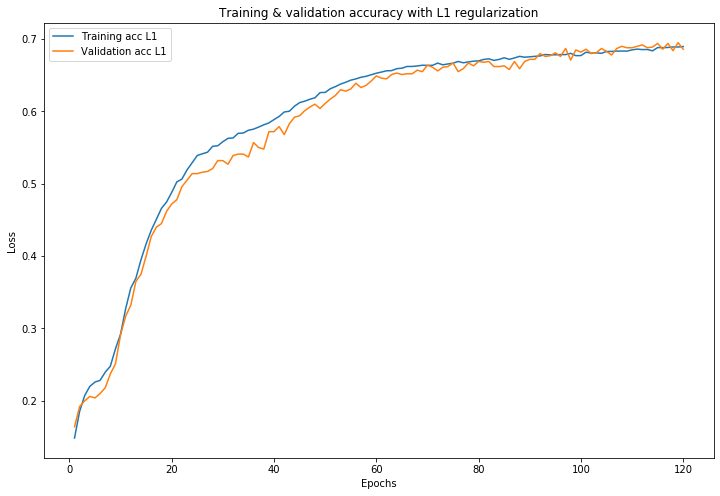

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))

L1_model_dict = L1_model.history

acc_values = L1_model_dict['accuracy'] 
val_acc_values = L1_model_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, acc_values, label='Training acc L1')
ax.plot(epochs, val_acc_values, label='Validation acc L1')
ax.set_title('Training & validation accuracy with L1 regularization')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

Notice how the training and validation accuracy don't diverge as much as before. Unfortunately, the validation accuracy doesn't reach rates much higher than 70%. It does seem like you can still improve the model by training much longer.

In [26]:
# ⏰ This cell may take several minutes to run
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l1(0.005), input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

L1_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=1000,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/1000
7500/7500 [==============================] - 6s 748us/sample - loss: 15.9479 - accuracy: 0.1529 - val_loss: 15.5516 - val_accuracy: 0.1540
Epoch 2/1000
7500/7500 [==============================] - 1s 90us/sample - loss: 15.1857 - accuracy: 0.1867 - val_loss: 14.8056 - val_accuracy: 0.1730
Epoch 3/1000
7500/7500 [==============================] - 1s 69us/sample - loss: 14.4469 - accuracy: 0.2037 - val_loss: 14.0804 - val_accuracy: 0.1930
Epoch 4/1000
7500/7500 [==============================] - 1s 80us/sample - loss: 13.7294 - accuracy: 0.2245 - val_loss: 13.3765 - val_accuracy: 0.2070
Epoch 5/1000
7500/7500 [==============================] - 1s 88us/sample - loss: 13.0322 - accuracy: 0.2380 - val_loss: 12.6926 - val_accuracy: 0.2270
Epoch 6/1000
7500/7500 [==============================] - 1s 81us/sample - loss: 12.3541 - accuracy: 0.2645 - val_loss: 12.0269 - val_accuracy: 0.2510
Epoch 7/1000
7500/7500 [=====================

7500/7500 [==============================] - 1s 71us/sample - loss: 1.8068 - accuracy: 0.6877 - val_loss: 1.8539 - val_accuracy: 0.6660
Epoch 56/1000
7500/7500 [==============================] - 1s 67us/sample - loss: 1.7947 - accuracy: 0.6901 - val_loss: 1.8387 - val_accuracy: 0.6710
Epoch 57/1000
7500/7500 [==============================] - 0s 66us/sample - loss: 1.7825 - accuracy: 0.6904 - val_loss: 1.8252 - val_accuracy: 0.6710
Epoch 58/1000
7500/7500 [==============================] - 1s 69us/sample - loss: 1.7711 - accuracy: 0.6888 - val_loss: 1.8125 - val_accuracy: 0.6720
Epoch 59/1000
7500/7500 [==============================] - 1s 70us/sample - loss: 1.7594 - accuracy: 0.6899 - val_loss: 1.8005 - val_accuracy: 0.6730
Epoch 60/1000
7500/7500 [==============================] - 0s 67us/sample - loss: 1.7478 - accuracy: 0.6903 - val_loss: 1.7888 - val_accuracy: 0.6750
Epoch 61/1000
7500/7500 [==============================] - 0s 63us/sample - loss: 1.7372 - accuracy: 0.6908 - val_

7500/7500 [==============================] - 1s 72us/sample - loss: 1.3909 - accuracy: 0.7125 - val_loss: 1.4288 - val_accuracy: 0.7000
Epoch 110/1000
7500/7500 [==============================] - 1s 73us/sample - loss: 1.3857 - accuracy: 0.7131 - val_loss: 1.4234 - val_accuracy: 0.7020
Epoch 111/1000
7500/7500 [==============================] - 0s 64us/sample - loss: 1.3806 - accuracy: 0.7136 - val_loss: 1.4248 - val_accuracy: 0.7010
Epoch 112/1000
7500/7500 [==============================] - 1s 131us/sample - loss: 1.3759 - accuracy: 0.7143 - val_loss: 1.4146 - val_accuracy: 0.7020
Epoch 113/1000
7500/7500 [==============================] - 1s 79us/sample - loss: 1.3710 - accuracy: 0.7132 - val_loss: 1.4087 - val_accuracy: 0.7010
Epoch 114/1000
7500/7500 [==============================] - 1s 87us/sample - loss: 1.3655 - accuracy: 0.7147 - val_loss: 1.4091 - val_accuracy: 0.7000
Epoch 115/1000
7500/7500 [==============================] - 1s 69us/sample - loss: 1.3610 - accuracy: 0.7139

7500/7500 [==============================] - 0s 63us/sample - loss: 1.1820 - accuracy: 0.7272 - val_loss: 1.2269 - val_accuracy: 0.7110
Epoch 164/1000
7500/7500 [==============================] - 0s 62us/sample - loss: 1.1791 - accuracy: 0.7276 - val_loss: 1.2230 - val_accuracy: 0.7120
Epoch 165/1000
7500/7500 [==============================] - 0s 66us/sample - loss: 1.1763 - accuracy: 0.7287 - val_loss: 1.2243 - val_accuracy: 0.7100
Epoch 166/1000
7500/7500 [==============================] - 0s 64us/sample - loss: 1.1742 - accuracy: 0.7265 - val_loss: 1.2202 - val_accuracy: 0.7100
Epoch 167/1000
7500/7500 [==============================] - 1s 67us/sample - loss: 1.1719 - accuracy: 0.7265 - val_loss: 1.2162 - val_accuracy: 0.7100
Epoch 168/1000
7500/7500 [==============================] - 0s 65us/sample - loss: 1.1683 - accuracy: 0.7304 - val_loss: 1.2147 - val_accuracy: 0.7150
Epoch 169/1000
7500/7500 [==============================] - 1s 69us/sample - loss: 1.1655 - accuracy: 0.7273 

7500/7500 [==============================] - 2s 267us/sample - loss: 1.0769 - accuracy: 0.7379 - val_loss: 1.1368 - val_accuracy: 0.7180
Epoch 218/1000
7500/7500 [==============================] - 1s 148us/sample - loss: 1.0756 - accuracy: 0.7367 - val_loss: 1.1351 - val_accuracy: 0.7200
Epoch 219/1000
7500/7500 [==============================] - 1s 117us/sample - loss: 1.0741 - accuracy: 0.7393 - val_loss: 1.1335 - val_accuracy: 0.7200
Epoch 220/1000
7500/7500 [==============================] - 1s 159us/sample - loss: 1.0728 - accuracy: 0.7376 - val_loss: 1.1320 - val_accuracy: 0.7170
Epoch 221/1000
7500/7500 [==============================] - 1s 121us/sample - loss: 1.0709 - accuracy: 0.7381 - val_loss: 1.1320 - val_accuracy: 0.7180
Epoch 222/1000
7500/7500 [==============================] - 2s 212us/sample - loss: 1.0697 - accuracy: 0.7377 - val_loss: 1.1274 - val_accuracy: 0.7180
Epoch 223/1000
7500/7500 [==============================] - 1s 132us/sample - loss: 1.0685 - accuracy: 

7500/7500 [==============================] - 1s 71us/sample - loss: 1.0173 - accuracy: 0.7481 - val_loss: 1.0860 - val_accuracy: 0.7300
Epoch 272/1000
7500/7500 [==============================] - 1s 73us/sample - loss: 1.0157 - accuracy: 0.7491 - val_loss: 1.0891 - val_accuracy: 0.7230
Epoch 273/1000
7500/7500 [==============================] - 1s 70us/sample - loss: 1.0153 - accuracy: 0.7484 - val_loss: 1.0843 - val_accuracy: 0.7310
Epoch 274/1000
7500/7500 [==============================] - 0s 65us/sample - loss: 1.0143 - accuracy: 0.7505 - val_loss: 1.0855 - val_accuracy: 0.7300
Epoch 275/1000
7500/7500 [==============================] - 1s 72us/sample - loss: 1.0136 - accuracy: 0.7481 - val_loss: 1.0870 - val_accuracy: 0.7300
Epoch 276/1000
7500/7500 [==============================] - 1s 71us/sample - loss: 1.0133 - accuracy: 0.7484 - val_loss: 1.0930 - val_accuracy: 0.7310
Epoch 277/1000
7500/7500 [==============================] - 1s 75us/sample - loss: 1.0124 - accuracy: 0.7483 

7500/7500 [==============================] - 1s 85us/sample - loss: 0.9793 - accuracy: 0.7563 - val_loss: 1.0612 - val_accuracy: 0.7270
Epoch 326/1000
7500/7500 [==============================] - 1s 88us/sample - loss: 0.9791 - accuracy: 0.7553 - val_loss: 1.0625 - val_accuracy: 0.7320
Epoch 327/1000
7500/7500 [==============================] - 1s 120us/sample - loss: 0.9785 - accuracy: 0.7560 - val_loss: 1.0618 - val_accuracy: 0.7340
Epoch 328/1000
7500/7500 [==============================] - 1s 73us/sample - loss: 0.9779 - accuracy: 0.7575 - val_loss: 1.0665 - val_accuracy: 0.7270
Epoch 329/1000
7500/7500 [==============================] - 1s 97us/sample - loss: 0.9776 - accuracy: 0.7579 - val_loss: 1.0678 - val_accuracy: 0.7250
Epoch 330/1000
7500/7500 [==============================] - 1s 114us/sample - loss: 0.9764 - accuracy: 0.7565 - val_loss: 1.0604 - val_accuracy: 0.7270
Epoch 331/1000
7500/7500 [==============================] - 1s 100us/sample - loss: 0.9758 - accuracy: 0.75

7500/7500 [==============================] - 1s 68us/sample - loss: 0.9546 - accuracy: 0.7631 - val_loss: 1.0433 - val_accuracy: 0.7340
Epoch 380/1000
7500/7500 [==============================] - 1s 76us/sample - loss: 0.9535 - accuracy: 0.7632 - val_loss: 1.0472 - val_accuracy: 0.7290
Epoch 381/1000
7500/7500 [==============================] - 1s 81us/sample - loss: 0.9533 - accuracy: 0.7617 - val_loss: 1.0504 - val_accuracy: 0.7390
Epoch 382/1000
7500/7500 [==============================] - 1s 70us/sample - loss: 0.9524 - accuracy: 0.7641 - val_loss: 1.0484 - val_accuracy: 0.7310
Epoch 383/1000
7500/7500 [==============================] - 1s 72us/sample - loss: 0.9524 - accuracy: 0.7623 - val_loss: 1.0492 - val_accuracy: 0.7290
Epoch 384/1000
7500/7500 [==============================] - 1s 74us/sample - loss: 0.9521 - accuracy: 0.7632 - val_loss: 1.0584 - val_accuracy: 0.7410
Epoch 385/1000
7500/7500 [==============================] - 1s 69us/sample - loss: 0.9520 - accuracy: 0.7643 

7500/7500 [==============================] - 1s 172us/sample - loss: 0.9353 - accuracy: 0.7677 - val_loss: 1.0480 - val_accuracy: 0.7400
Epoch 434/1000
7500/7500 [==============================] - 1s 110us/sample - loss: 0.9354 - accuracy: 0.7675 - val_loss: 1.0462 - val_accuracy: 0.7380
Epoch 435/1000
7500/7500 [==============================] - 1s 120us/sample - loss: 0.9345 - accuracy: 0.7680 - val_loss: 1.0432 - val_accuracy: 0.7320
Epoch 436/1000
7500/7500 [==============================] - 1s 69us/sample - loss: 0.9351 - accuracy: 0.7683 - val_loss: 1.0434 - val_accuracy: 0.7290
Epoch 437/1000
7500/7500 [==============================] - 1s 70us/sample - loss: 0.9336 - accuracy: 0.7660 - val_loss: 1.0393 - val_accuracy: 0.7410
Epoch 438/1000
7500/7500 [==============================] - 1s 74us/sample - loss: 0.9337 - accuracy: 0.7652 - val_loss: 1.0326 - val_accuracy: 0.7410
Epoch 439/1000
7500/7500 [==============================] - 1s 92us/sample - loss: 0.9338 - accuracy: 0.76

7500/7500 [==============================] - 0s 62us/sample - loss: 0.9201 - accuracy: 0.7708 - val_loss: 1.0295 - val_accuracy: 0.7350
Epoch 488/1000
7500/7500 [==============================] - 0s 61us/sample - loss: 0.9192 - accuracy: 0.7712 - val_loss: 1.0320 - val_accuracy: 0.7370
Epoch 489/1000
7500/7500 [==============================] - 0s 63us/sample - loss: 0.9194 - accuracy: 0.7737 - val_loss: 1.0309 - val_accuracy: 0.7390
Epoch 490/1000
7500/7500 [==============================] - 0s 65us/sample - loss: 0.9180 - accuracy: 0.7721 - val_loss: 1.0239 - val_accuracy: 0.7400
Epoch 491/1000
7500/7500 [==============================] - 0s 63us/sample - loss: 0.9199 - accuracy: 0.7716 - val_loss: 1.0272 - val_accuracy: 0.7370
Epoch 492/1000
7500/7500 [==============================] - 0s 62us/sample - loss: 0.9183 - accuracy: 0.7717 - val_loss: 1.0277 - val_accuracy: 0.7370
Epoch 493/1000
7500/7500 [==============================] - 0s 61us/sample - loss: 0.9175 - accuracy: 0.7727 

7500/7500 [==============================] - 0s 64us/sample - loss: 0.9045 - accuracy: 0.7768 - val_loss: 1.0226 - val_accuracy: 0.7390
Epoch 542/1000
7500/7500 [==============================] - 1s 70us/sample - loss: 0.9043 - accuracy: 0.7765 - val_loss: 1.0272 - val_accuracy: 0.7330
Epoch 543/1000
7500/7500 [==============================] - 0s 66us/sample - loss: 0.9048 - accuracy: 0.7757 - val_loss: 1.0228 - val_accuracy: 0.7390
Epoch 544/1000
7500/7500 [==============================] - 1s 73us/sample - loss: 0.9037 - accuracy: 0.7748 - val_loss: 1.0261 - val_accuracy: 0.7350
Epoch 545/1000
7500/7500 [==============================] - 0s 65us/sample - loss: 0.9051 - accuracy: 0.7739 - val_loss: 1.0267 - val_accuracy: 0.7310
Epoch 546/1000
7500/7500 [==============================] - 0s 58us/sample - loss: 0.9048 - accuracy: 0.7721 - val_loss: 1.0498 - val_accuracy: 0.7350
Epoch 547/1000
7500/7500 [==============================] - 0s 62us/sample - loss: 0.9048 - accuracy: 0.7740 

7500/7500 [==============================] - 0s 57us/sample - loss: 0.8917 - accuracy: 0.7793 - val_loss: 1.0516 - val_accuracy: 0.7280
Epoch 596/1000
7500/7500 [==============================] - 0s 62us/sample - loss: 0.8934 - accuracy: 0.7773 - val_loss: 1.0156 - val_accuracy: 0.7420
Epoch 597/1000
7500/7500 [==============================] - 0s 57us/sample - loss: 0.8915 - accuracy: 0.7792 - val_loss: 1.0168 - val_accuracy: 0.7360
Epoch 598/1000
7500/7500 [==============================] - 0s 61us/sample - loss: 0.8900 - accuracy: 0.7781 - val_loss: 1.0152 - val_accuracy: 0.7460
Epoch 599/1000
7500/7500 [==============================] - 0s 61us/sample - loss: 0.8934 - accuracy: 0.7784 - val_loss: 1.0210 - val_accuracy: 0.7350
Epoch 600/1000
7500/7500 [==============================] - 0s 58us/sample - loss: 0.8910 - accuracy: 0.7785 - val_loss: 1.0207 - val_accuracy: 0.7440
Epoch 601/1000
7500/7500 [==============================] - 0s 59us/sample - loss: 0.8896 - accuracy: 0.7793 

7500/7500 [==============================] - 0s 57us/sample - loss: 0.8793 - accuracy: 0.7813 - val_loss: 1.0048 - val_accuracy: 0.7450
Epoch 650/1000
7500/7500 [==============================] - 0s 61us/sample - loss: 0.8792 - accuracy: 0.7804 - val_loss: 1.0116 - val_accuracy: 0.7420
Epoch 651/1000
7500/7500 [==============================] - 1s 71us/sample - loss: 0.8788 - accuracy: 0.7831 - val_loss: 1.0106 - val_accuracy: 0.7410
Epoch 652/1000
7500/7500 [==============================] - 1s 71us/sample - loss: 0.8776 - accuracy: 0.7812 - val_loss: 1.0107 - val_accuracy: 0.7410
Epoch 653/1000
7500/7500 [==============================] - 0s 64us/sample - loss: 0.8780 - accuracy: 0.7815 - val_loss: 1.0085 - val_accuracy: 0.7430
Epoch 654/1000
7500/7500 [==============================] - 0s 64us/sample - loss: 0.8779 - accuracy: 0.7787 - val_loss: 1.0123 - val_accuracy: 0.7400
Epoch 655/1000
7500/7500 [==============================] - 0s 63us/sample - loss: 0.8771 - accuracy: 0.7817 

7500/7500 [==============================] - 1s 72us/sample - loss: 0.8665 - accuracy: 0.7853 - val_loss: 0.9970 - val_accuracy: 0.7520
Epoch 704/1000
7500/7500 [==============================] - 1s 71us/sample - loss: 0.8658 - accuracy: 0.7872 - val_loss: 1.0161 - val_accuracy: 0.7420
Epoch 705/1000
7500/7500 [==============================] - 0s 60us/sample - loss: 0.8673 - accuracy: 0.7828 - val_loss: 1.0021 - val_accuracy: 0.7480
Epoch 706/1000
7500/7500 [==============================] - 1s 78us/sample - loss: 0.8666 - accuracy: 0.7865 - val_loss: 0.9972 - val_accuracy: 0.7430
Epoch 707/1000
7500/7500 [==============================] - 0s 63us/sample - loss: 0.8652 - accuracy: 0.7857 - val_loss: 1.0267 - val_accuracy: 0.7350
Epoch 708/1000
7500/7500 [==============================] - 1s 78us/sample - loss: 0.8696 - accuracy: 0.7817 - val_loss: 1.0069 - val_accuracy: 0.7470
Epoch 709/1000
7500/7500 [==============================] - 0s 63us/sample - loss: 0.8658 - accuracy: 0.7839 

7500/7500 [==============================] - 0s 67us/sample - loss: 0.8559 - accuracy: 0.7905 - val_loss: 0.9907 - val_accuracy: 0.7520
Epoch 758/1000
7500/7500 [==============================] - 0s 61us/sample - loss: 0.8555 - accuracy: 0.7895 - val_loss: 1.0769 - val_accuracy: 0.7260
Epoch 759/1000
7500/7500 [==============================] - 1s 68us/sample - loss: 0.8581 - accuracy: 0.7859 - val_loss: 0.9957 - val_accuracy: 0.7530
Epoch 760/1000
7500/7500 [==============================] - 0s 61us/sample - loss: 0.8577 - accuracy: 0.7877 - val_loss: 1.0065 - val_accuracy: 0.7420
Epoch 761/1000
7500/7500 [==============================] - 0s 57us/sample - loss: 0.8576 - accuracy: 0.7887 - val_loss: 1.0030 - val_accuracy: 0.7440
Epoch 762/1000
7500/7500 [==============================] - 0s 60us/sample - loss: 0.8568 - accuracy: 0.7887 - val_loss: 0.9904 - val_accuracy: 0.7490
Epoch 763/1000
7500/7500 [==============================] - 0s 58us/sample - loss: 0.8543 - accuracy: 0.7897 

7500/7500 [==============================] - 1s 72us/sample - loss: 0.8494 - accuracy: 0.7899 - val_loss: 1.0229 - val_accuracy: 0.7480
Epoch 812/1000
7500/7500 [==============================] - 1s 71us/sample - loss: 0.8498 - accuracy: 0.7873 - val_loss: 1.0816 - val_accuracy: 0.7190
Epoch 813/1000
7500/7500 [==============================] - 1s 80us/sample - loss: 0.8485 - accuracy: 0.7909 - val_loss: 1.0339 - val_accuracy: 0.7390
Epoch 814/1000
7500/7500 [==============================] - 1s 67us/sample - loss: 0.8473 - accuracy: 0.7912 - val_loss: 1.0301 - val_accuracy: 0.7350
Epoch 815/1000
7500/7500 [==============================] - 1s 69us/sample - loss: 0.8481 - accuracy: 0.7900 - val_loss: 1.0097 - val_accuracy: 0.7490
Epoch 816/1000
7500/7500 [==============================] - 1s 71us/sample - loss: 0.8468 - accuracy: 0.7913 - val_loss: 0.9929 - val_accuracy: 0.7470
Epoch 817/1000
7500/7500 [==============================] - 1s 68us/sample - loss: 0.8459 - accuracy: 0.7927 

7500/7500 [==============================] - 1s 81us/sample - loss: 0.8374 - accuracy: 0.7916 - val_loss: 1.0146 - val_accuracy: 0.7370
Epoch 866/1000
7500/7500 [==============================] - 1s 80us/sample - loss: 0.8441 - accuracy: 0.7897 - val_loss: 0.9894 - val_accuracy: 0.7450
Epoch 867/1000
7500/7500 [==============================] - 1s 81us/sample - loss: 0.8360 - accuracy: 0.7980 - val_loss: 0.9949 - val_accuracy: 0.7370
Epoch 868/1000
7500/7500 [==============================] - 1s 73us/sample - loss: 0.8363 - accuracy: 0.7947 - val_loss: 1.0308 - val_accuracy: 0.7410
Epoch 869/1000
7500/7500 [==============================] - 1s 84us/sample - loss: 0.8447 - accuracy: 0.7936 - val_loss: 1.0044 - val_accuracy: 0.7410
Epoch 870/1000
7500/7500 [==============================] - 1s 74us/sample - loss: 0.8392 - accuracy: 0.7936 - val_loss: 0.9859 - val_accuracy: 0.7500
Epoch 871/1000
7500/7500 [==============================] - 1s 75us/sample - loss: 0.8364 - accuracy: 0.7940 

7500/7500 [==============================] - 1s 98us/sample - loss: 0.8324 - accuracy: 0.7928 - val_loss: 0.9910 - val_accuracy: 0.7440
Epoch 920/1000
7500/7500 [==============================] - 1s 83us/sample - loss: 0.8306 - accuracy: 0.7972 - val_loss: 1.1063 - val_accuracy: 0.7060
Epoch 921/1000
7500/7500 [==============================] - 1s 78us/sample - loss: 0.8370 - accuracy: 0.7941 - val_loss: 0.9981 - val_accuracy: 0.7450
Epoch 922/1000
7500/7500 [==============================] - 1s 81us/sample - loss: 0.8270 - accuracy: 0.7960 - val_loss: 1.0144 - val_accuracy: 0.7320
Epoch 923/1000
7500/7500 [==============================] - 1s 140us/sample - loss: 0.8322 - accuracy: 0.7961 - val_loss: 0.9966 - val_accuracy: 0.7370
Epoch 924/1000
7500/7500 [==============================] - 1s 174us/sample - loss: 0.8314 - accuracy: 0.7931 - val_loss: 1.0104 - val_accuracy: 0.7470
Epoch 925/1000
7500/7500 [==============================] - 1s 123us/sample - loss: 0.8274 - accuracy: 0.79

7500/7500 [==============================] - 1s 77us/sample - loss: 0.8275 - accuracy: 0.8013 - val_loss: 1.0070 - val_accuracy: 0.7380
Epoch 974/1000
7500/7500 [==============================] - 1s 72us/sample - loss: 0.8241 - accuracy: 0.7969 - val_loss: 0.9939 - val_accuracy: 0.7440
Epoch 975/1000
7500/7500 [==============================] - 1s 77us/sample - loss: 0.8248 - accuracy: 0.7983 - val_loss: 0.9937 - val_accuracy: 0.7470
Epoch 976/1000
7500/7500 [==============================] - 1s 74us/sample - loss: 0.8288 - accuracy: 0.7947 - val_loss: 1.0247 - val_accuracy: 0.7280
Epoch 977/1000
7500/7500 [==============================] - 1s 130us/sample - loss: 0.8238 - accuracy: 0.7975 - val_loss: 1.0072 - val_accuracy: 0.7430
Epoch 978/1000
7500/7500 [==============================] - 1s 110us/sample - loss: 0.8279 - accuracy: 0.7944 - val_loss: 0.9881 - val_accuracy: 0.7540
Epoch 979/1000
7500/7500 [==============================] - 1s 94us/sample - loss: 0.8230 - accuracy: 0.796

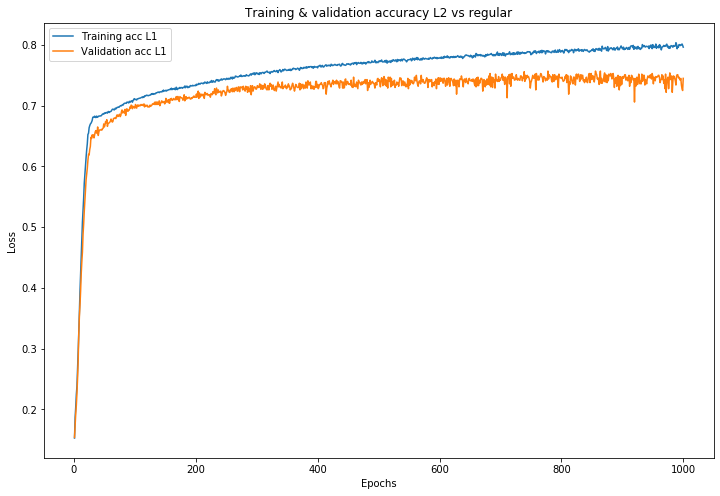

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

L1_model_dict = L1_model.history

acc_values = L1_model_dict['accuracy'] 
val_acc_values = L1_model_dict['val_accuracy']

epochs = range(1, len(acc_values) + 1)
ax.plot(epochs, acc_values, label='Training acc L1')
ax.plot(epochs, val_acc_values, label='Validation acc L1')
ax.set_title('Training & validation accuracy L2 vs regular')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

In [28]:
results_train = model.evaluate(X_train_tok, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

results_test = model.evaluate(X_test_tok, y_test_cat)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')   

7500/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training Loss: 0.832 Training Accuracy: 0.8
1500/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Testing Loss: 0.9 Testing Accuracy: 0.777


This is about the best result you've achieved so far, but you were training for quite a while! Next, experiment with dropout regularization to see if it offers any advantages.

## Dropout Regularization

In [29]:
# ⏰ This cell may take about a minute to run
random.seed(123)
model = models.Sequential()
model.add(layers.Dropout(0.3, input_shape=(2000,)))
model.add(layers.Dense(50, activation='relu')) #2 hidden layers
model.add(layers.Dropout(0.3))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

dropout_model = model.fit(X_train_tok,
                    y_train_lb,
                    epochs=200,
                    batch_size=256,
                    validation_data=(X_val, y_val))

Train on 7500 samples, validate on 1000 samples
Epoch 1/200
7500/7500 [==============================] - 5s 660us/sample - loss: 1.9805 - accuracy: 0.1389 - val_loss: 1.9412 - val_accuracy: 0.1410
Epoch 2/200
7500/7500 [==============================] - 2s 262us/sample - loss: 1.9522 - accuracy: 0.1481 - val_loss: 1.9287 - val_accuracy: 0.1760
Epoch 3/200
7500/7500 [==============================] - 2s 261us/sample - loss: 1.9406 - accuracy: 0.1595 - val_loss: 1.9199 - val_accuracy: 0.1960
Epoch 4/200
7500/7500 [==============================] - 2s 238us/sample - loss: 1.9327 - accuracy: 0.1604 - val_loss: 1.9107 - val_accuracy: 0.2200
Epoch 5/200
7500/7500 [==============================] - 2s 231us/sample - loss: 1.9239 - accuracy: 0.1789 - val_loss: 1.9021 - val_accuracy: 0.2280
Epoch 6/200
7500/7500 [==============================] - 2s 252us/sample - loss: 1.9141 - accuracy: 0.1916 - val_loss: 1.8922 - val_accuracy: 0.2430
Epoch 7/200
7500/7500 [==============================] - 2

7500/7500 [==============================] - 2s 280us/sample - loss: 1.3388 - accuracy: 0.4855 - val_loss: 1.1926 - val_accuracy: 0.6520
Epoch 56/200
7500/7500 [==============================] - 2s 255us/sample - loss: 1.3305 - accuracy: 0.4935 - val_loss: 1.1788 - val_accuracy: 0.6600
Epoch 57/200
7500/7500 [==============================] - 2s 249us/sample - loss: 1.3283 - accuracy: 0.4952 - val_loss: 1.1704 - val_accuracy: 0.6660
Epoch 58/200
7500/7500 [==============================] - 2s 253us/sample - loss: 1.3169 - accuracy: 0.5064 - val_loss: 1.1562 - val_accuracy: 0.6720
Epoch 59/200
7500/7500 [==============================] - 2s 274us/sample - loss: 1.3081 - accuracy: 0.5088 - val_loss: 1.1434 - val_accuracy: 0.6800
Epoch 60/200
7500/7500 [==============================] - 2s 246us/sample - loss: 1.2990 - accuracy: 0.5059 - val_loss: 1.1348 - val_accuracy: 0.6840
Epoch 61/200
7500/7500 [==============================] - 2s 237us/sample - loss: 1.2913 - accuracy: 0.5188 - val

7500/7500 [==============================] - 2s 267us/sample - loss: 0.9928 - accuracy: 0.6353 - val_loss: 0.8043 - val_accuracy: 0.7470
Epoch 110/200
7500/7500 [==============================] - 2s 255us/sample - loss: 0.9868 - accuracy: 0.6336 - val_loss: 0.8031 - val_accuracy: 0.7430
Epoch 111/200
7500/7500 [==============================] - 2s 251us/sample - loss: 0.9711 - accuracy: 0.6411 - val_loss: 0.7982 - val_accuracy: 0.7480
Epoch 112/200
7500/7500 [==============================] - 2s 243us/sample - loss: 0.9776 - accuracy: 0.6369 - val_loss: 0.7985 - val_accuracy: 0.7440
Epoch 113/200
7500/7500 [==============================] - 2s 240us/sample - loss: 0.9848 - accuracy: 0.6356 - val_loss: 0.7962 - val_accuracy: 0.7470
Epoch 114/200
7500/7500 [==============================] - 2s 260us/sample - loss: 0.9738 - accuracy: 0.6372 - val_loss: 0.7928 - val_accuracy: 0.7460
Epoch 115/200
7500/7500 [==============================] - 2s 261us/sample - loss: 0.9676 - accuracy: 0.6423

7500/7500 [==============================] - 2s 249us/sample - loss: 0.8494 - accuracy: 0.6817 - val_loss: 0.7071 - val_accuracy: 0.7520
Epoch 164/200
7500/7500 [==============================] - 2s 239us/sample - loss: 0.8425 - accuracy: 0.6885 - val_loss: 0.7059 - val_accuracy: 0.7500
Epoch 165/200
7500/7500 [==============================] - 2s 238us/sample - loss: 0.8224 - accuracy: 0.6904 - val_loss: 0.7051 - val_accuracy: 0.7540
Epoch 166/200
7500/7500 [==============================] - 2s 234us/sample - loss: 0.8417 - accuracy: 0.6885 - val_loss: 0.7056 - val_accuracy: 0.7540
Epoch 167/200
7500/7500 [==============================] - 2s 225us/sample - loss: 0.8401 - accuracy: 0.6909 - val_loss: 0.7051 - val_accuracy: 0.7540
Epoch 168/200
7500/7500 [==============================] - 2s 231us/sample - loss: 0.8237 - accuracy: 0.6975 - val_loss: 0.7030 - val_accuracy: 0.7560
Epoch 169/200
7500/7500 [==============================] - 2s 228us/sample - loss: 0.8380 - accuracy: 0.6897

In [30]:
results_train = model.evaluate(X_train_tok, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

results_test = model.evaluate(X_test_tok, y_test_cat)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')   

7500/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training Loss: 0.487 Training Accuracy: 0.824
1500/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Testing Loss: 0.588 Testing Accuracy: 0.787


You can see here that the validation performance has improved again! The variance did become higher again compared to L1-regularization.

## Bigger Data?

In the lecture, one of the solutions to high variance was just getting more data. You actually *have* more data, but took a subset of 10,000 units before. Let's now quadruple your data set, and see what happens. Note that you are really just lucky here, and getting more data isn't always possible, but this is a useful exercise in order to understand the power of big data sets.

In [31]:
df = pd.read_csv('Bank_complaints.csv')
df = df.sample(40000, random_state=123)

X = df["Consumer complaint narrative"]
y = df["Product"]

# train test split
X_train_lrg, X_test_lrg, y_train_lrg, y_test_lrg = train_test_split(X, y, random_state=42)

#Validation set
X_train_final_lrg, X_val_lrg, y_train_final_lrg, y_val_lrg = train_test_split(X_train_lrg, y_train_lrg, random_state=123)


#one-hot encoding of the complaints
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train_final_lrg)

X_train_tok_lrg = tokenizer.texts_to_matrix(X_train_final_lrg, mode='binary')
X_val_lrg = tokenizer.texts_to_matrix(X_val_lrg, mode='binary')
X_test_lrg = tokenizer.texts_to_matrix(X_test_lrg, mode='binary')

#one-hot encoding of products
lb = LabelBinarizer()
lb.fit(y_train_final_lrg)

y_train_lb_lrg = to_categorical(lb.transform(y_train_final_lrg))[:, :, 1]
y_val_lrg = to_categorical(lb.transform(y_val_lrg))[:, :, 1]
y_test_lrg = to_categorical(lb.transform(y_test_lrg))[:, :, 1]

In [32]:
# ⏰ This cell may take several minutes to run
random.seed(123)
model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape=(2000,))) #2 hidden layers
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

moredata_model = model.fit(X_train_tok_lrg,
                    y_train_lb_lrg,
                    epochs=120,
                    batch_size=256,
                    validation_data=(X_val_lrg, y_val_lrg))

Train on 22500 samples, validate on 7500 samples
Epoch 1/120
22500/22500 [==============================] - 4s 176us/sample - loss: 1.9392 - accuracy: 0.1707 - val_loss: 1.9227 - val_accuracy: 0.1995
Epoch 2/120
22500/22500 [==============================] - 1s 58us/sample - loss: 1.9081 - accuracy: 0.2213 - val_loss: 1.8932 - val_accuracy: 0.2467
Epoch 3/120
22500/22500 [==============================] - 1s 55us/sample - loss: 1.8722 - accuracy: 0.2680 - val_loss: 1.8498 - val_accuracy: 0.2904
Epoch 4/120
22500/22500 [==============================] - 1s 58us/sample - loss: 1.8184 - accuracy: 0.3122 - val_loss: 1.7883 - val_accuracy: 0.3269
Epoch 5/120
22500/22500 [==============================] - 1s 58us/sample - loss: 1.7457 - accuracy: 0.3597 - val_loss: 1.7066 - val_accuracy: 0.3783
Epoch 6/120
22500/22500 [==============================] - 1s 60us/sample - loss: 1.6534 - accuracy: 0.4145 - val_loss: 1.6063 - val_accuracy: 0.4329
Epoch 7/120
22500/22500 [=========================

Epoch 55/120
22500/22500 [==============================] - 2s 89us/sample - loss: 0.4462 - accuracy: 0.8443 - val_loss: 0.5852 - val_accuracy: 0.7844
Epoch 56/120
22500/22500 [==============================] - 2s 92us/sample - loss: 0.4427 - accuracy: 0.8448 - val_loss: 0.5837 - val_accuracy: 0.7873
Epoch 57/120
22500/22500 [==============================] - 2s 83us/sample - loss: 0.4396 - accuracy: 0.8460 - val_loss: 0.5839 - val_accuracy: 0.7865
Epoch 58/120
22500/22500 [==============================] - 2s 83us/sample - loss: 0.4362 - accuracy: 0.8470 - val_loss: 0.5816 - val_accuracy: 0.7869
Epoch 59/120
22500/22500 [==============================] - 2s 95us/sample - loss: 0.4334 - accuracy: 0.8488 - val_loss: 0.5803 - val_accuracy: 0.7879
Epoch 60/120
22500/22500 [==============================] - 2s 90us/sample - loss: 0.4299 - accuracy: 0.8493 - val_loss: 0.5804 - val_accuracy: 0.7867
Epoch 61/120
22500/22500 [==============================] - 2s 101us/sample - loss: 0.4266 - a

22500/22500 [==============================] - 1s 61us/sample - loss: 0.3208 - accuracy: 0.8913 - val_loss: 0.6008 - val_accuracy: 0.7944
Epoch 110/120
22500/22500 [==============================] - 2s 87us/sample - loss: 0.3190 - accuracy: 0.8915 - val_loss: 0.6009 - val_accuracy: 0.7925
Epoch 111/120
22500/22500 [==============================] - 1s 59us/sample - loss: 0.3173 - accuracy: 0.8934 - val_loss: 0.6021 - val_accuracy: 0.7957
Epoch 112/120
22500/22500 [==============================] - 2s 88us/sample - loss: 0.3157 - accuracy: 0.8931 - val_loss: 0.6032 - val_accuracy: 0.7941
Epoch 113/120
22500/22500 [==============================] - 3s 125us/sample - loss: 0.3140 - accuracy: 0.8939 - val_loss: 0.6040 - val_accuracy: 0.7960
Epoch 114/120
22500/22500 [==============================] - 3s 124us/sample - loss: 0.3124 - accuracy: 0.8953 - val_loss: 0.6054 - val_accuracy: 0.7952
Epoch 115/120
22500/22500 [==============================] - 1s 64us/sample - loss: 0.3110 - accurac

In [33]:
results_train = model.evaluate(X_train_tok_lrg, y_train_lb_lrg)
print(f'Training Loss: {results_train[0]:.3} Training Accuracy: {results_train[1]:.3}')

results_test = model.evaluate(X_test_lrg, y_test_lrg)
print(f'Testing Loss: {results_test[0]:.3} Testing Accuracy: {results_test[1]:.3}')

22500/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Training Loss: 0.298 Training Accuracy: 0.901
10000/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Testing Loss: 0.605 Testing Accuracy: 0.791


With the same amount of epochs, you were able to get a fairly similar validation accuracy of 89.67 (compared to 88.45 in obtained in the first model in this lab). Your test set accuracy went up from 75.8 to 79.2% though, without any other regularization technique. You can still consider early stopping, L1, L2 and dropout here. It's clear that having more data has a strong impact on model performance!

## Additional Resources

* https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb
* https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/
* https://catalog.data.gov/dataset/consumer-complaint-database

## Summary  

In this lesson, you not only built an initial deep-learning model, you then used a validation set to tune your model using various types of regularization.